📁 Upload your advanced stats CSV file (e.g., nba_advanced_stats_2024_2025.csv)


Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025 (3).csv
✅ Available Columns: ['Player', 'PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
📊 Total Rows (Before Cleaning): 735
✅ Players after applying filters: 59
🏀 Top 10 All-Around Impact Players (2024–25) – Normalized Multi-Metric Ranking


,Player,VORP,WS,PER,OBPM,DBPM,BPM,AllAroundScore
0,Nikola Jokic,9.8,16.4,32.0,9.9,3.3,13.3,0.996296
1,Shai Gilgeous-Alexander,8.9,16.7,30.7,8.9,2.6,11.5,0.908131
2,Giannis Antetokounmpo,6.6,11.5,30.5,6.9,2.5,9.5,0.736177
3,Tyrese Haliburton,4.9,10.4,21.8,5.7,0.2,5.8,0.454413
4,Domantas Sabonis,4.4,10.1,22.9,4.2,1.1,5.2,0.447058
5,Luka Doncic,3.9,5.9,24.1,5.5,1.2,6.7,0.443416
6,Anthony Davis,3.2,6.7,26.3,3.9,1.5,5.4,0.431655
7,Stephen Curry,4.8,7.9,21.5,6.4,0.0,6.3,0.430378
8,Jayson Tatum,4.8,9.5,21.7,4.4,0.8,5.2,0.427860
9,LeBron James,4.7,7.7,22.7,4.9,0.7,5.6,0.426272


/tmp/ipython-input-5-3075889682.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AllAroundScore', y='Player', data=df_top, palette='coolwarm')


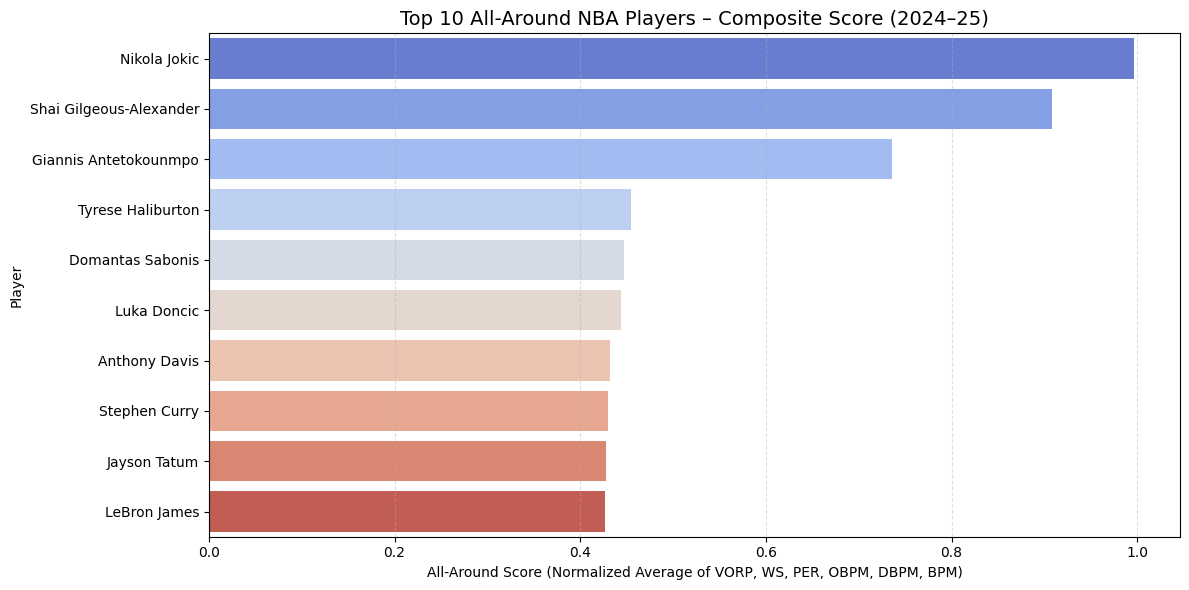

✅ Results saved to: top10_allaround_composite_2024_2025.csv


In [5]:
# 📓 Statline Quick Contribution Notebook
# 🎯 All-Around Impact Showcase – 2024–25 Season (Multi-Metric Ranking)

# 🟦 Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# 🟦 Step 2: Upload CSV file
print("📁 Upload your advanced stats CSV file (e.g., nba_advanced_stats_2024_2025.csv)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 🟦 Step 3: Load dataset
df = pd.read_csv(filename)

# 🟦 Step 4: Initial inspection
print("✅ Available Columns:", df.columns.tolist())
print(f"📊 Total Rows (Before Cleaning): {len(df)}")

# 🟦 Step 5: Convert relevant advanced stats to numeric
adv_cols = ['VORP', 'WS', 'PER', 'OBPM', 'DBPM', 'BPM']
df[adv_cols] = df[adv_cols].apply(pd.to_numeric, errors='coerce')

# 🟦 Step 6: Drop exact duplicate players (if any)
df = df.drop_duplicates(subset='Player')

# 🟦 Step 7: Filter elite all-around performers
df_filtered = df[
    (df['VORP'] > 1.0) &
    (df['WS'] > 3.0) &
    (df['PER'] > 18)
].copy()
print(f"✅ Players after applying filters: {len(df_filtered)}")

# 🟦 Step 8: Normalize metrics using MinMaxScaler
scaler = MinMaxScaler()
norm_cols = ['VORP', 'WS', 'PER', 'OBPM', 'DBPM', 'BPM']
df_filtered[[col + '_norm' for col in norm_cols]] = scaler.fit_transform(df_filtered[norm_cols])

# 🟦 Step 9: Compute Composite All-Around Score (mean of normalized metrics)
df_filtered['AllAroundScore'] = df_filtered[
    [col + '_norm' for col in norm_cols]
].mean(axis=1)

# 🟦 Step 10: Sort by AllAroundScore and select top 10
df_top = df_filtered.sort_values(by='AllAroundScore', ascending=False).head(10).reset_index(drop=True)

# 🟦 Step 11: Show final results
print("🏀 Top 10 All-Around Impact Players (2024–25) – Normalized Multi-Metric Ranking")

# Detect team column automatically
team_col = next((col for col in ['Team', 'Tm', 'TEAM', 'team'] if col in df_top.columns), None)

# Define display columns
display_cols = ['Player']
if team_col:
    display_cols.append(team_col)
display_cols += ['VORP', 'WS', 'PER', 'OBPM', 'DBPM', 'BPM', 'AllAroundScore']

# Display the top 10 table
display(df_top[display_cols])

# 🟦 Step 12: Visualize using a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='AllAroundScore', y='Player', data=df_top, palette='coolwarm')
plt.title("Top 10 All-Around NBA Players – Composite Score (2024–25)", fontsize=14)
plt.xlabel("All-Around Score (Normalized Average of VORP, WS, PER, OBPM, DBPM, BPM)")
plt.ylabel("Player")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 🟦 Step 13: Save to CSV
output_filename = "top10_allaround_composite_2024_2025.csv"
df_top[display_cols].to_csv(output_filename, index=False)
print(f"✅ Results saved to: {output_filename}")